<a href="https://colab.research.google.com/github/DiahKurnillah/Praktikum-Komputasi-Biomedis/blob/main/KombioPrak_ChapIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3. Finding-Root Method: Newton-Raphson**

---
**Tujuan** : Menentukan akar-akar fungsi dengan menggunakan metode Newton-Raphson

**Literature Review**

Masalah pencarian akar adalah salah satu masalah paling dasar dalam analisis numerik. Metode ini menggunakan metode aproksimasi dengan menggunakan satu titik awal dan menurunkannya dengan mengambil kemiringan atau gradien pada titik tersebut. Titik aproksimasi didefinisikan sebagai berikut:
$$𝑥_n+_1=𝑥𝑛-𝑓(𝑥_𝑛)/𝑓′(𝑥_𝑛)$$



# Preliminary Task


dengan persamaan $𝑓(𝑥)= 𝑥^3 + 𝑥^2 + 𝑥 + 1$

Carilah akar-akarnya dalam interval yang diberikan dengan menggunakan metode Newton-Raphson

In [ ]:
import math

def newton_raphson(f, df, x0, tol, max_iter):
    """
    Metode Newton-Raphson untuk mencari akar suatu persamaan non-linear.

    Parameters:
        f: Fungsi persamaan yang akan dicari akarnya.
        df: Turunan pertama dari fungsi f.
        x0: Tebakan awal.
        tol: Toleransi, batas error yang diterima.
        max_iter: Jumlah maksimum iterasi.

    Returns:
        x: Akar yang ditemukan.
        iter_count: Jumlah iterasi yang dilakukan.
    """
    x = x0
    iter_count = 0

    while iter_count < max_iter:
        f_x = f(x)
        df_x = df(x)

        if abs(f_x) < tol:
            return x, iter_count

        x = x - f_x / df_x
        iter_count += 1

    raise Exception("Metode Newton-Raphson tidak konvergen")

# Contoh penggunaan:
if __name__ == "__main__":
    # Definisikan fungsi persamaan dan turunannya
    def f(x):
        return x**3 + x**2 + x + 1

    def df(x):
        return 3*x**2 + 2*x + 1

    # Tebakan awal, toleransi, dan jumlah maksimum iterasi
    x0 = 1.0
    tol = 1e-6
    max_iter = 10

    # Panggil metode Newton-Raphson
    akar, iterasi = newton_raphson(f, df, x0, tol, max_iter)

    print(f"Akar yang ditemukan: {akar}")
    print(f"Pada iterasi ke-{iterasi}")

Akar yang ditemukan: -1.000000023673033
Pada iterasi ke-7


# Task
Osteoporosis in Chinese Woman. Wu et al. (2008) studied the variations in age-related speed of sound (SOS) at the tibia and the prevalence of osteoporosis in native Chinese women. They obtained the following relationship between the SOS and the age in year, Y.


$$𝑆𝑂𝑆=3383+39.9𝑌−0.78𝑌^2+0.0039𝑌^3$$

Where the SOS is expressed in unit of $m/s$. The SOS for one research subject is measured to be $3850 m/s$. Use the Newton-Raphson to find the root of the above equation! Take $Y=45$ years as initial guess!

```
𝑆𝑂𝑆 = 3383 + 39.9*𝑌 − 0.78𝑌**2 + 0.0039𝑌**3
```


Iterasi   |   xn   |   f(xn)
1         | 60.7983| -47.8924
2         | 56.7039| -1.4187
3         | 56.5742| -0.0020
4         | 56.5741| -0.0000
Metode Newton-Raphson konvergen. Didapat nilai akar: 56.5741


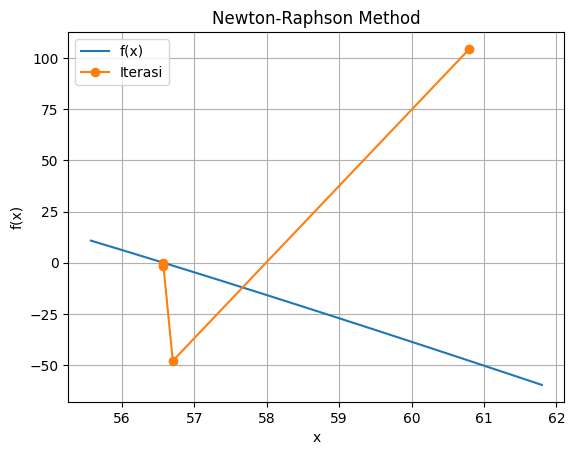

In [ ]:
import numpy as np
import math
from matplotlib import pylab, mlab, pyplot

def f(x):
  return 3383 - 3850 + 39.9*x - 0.78*x**2 + 0.0039*x**3

def df(x):
  return 39.9 - 1.56*x + 0.0117*x**2

Y = 45 # Sebagai nilai tebakan awal
iterasi = 100
toleransi = 0.01

# Menyimpan nilai dalam bentuk array untuk kemudian di plot
iterasi = []
x_values = []
f_values = []
xn = Y
n = 0

print("Iterasi   |   xn   |   f(xn)")
print('============================')
while True:
  fn = f(xn)
  xn = xn - fn / df(xn) # Rumus untuk newton rapson method
  n += 1
  iterasi.append(len(iterasi) + 1)
  x_values.append(xn)
  f_values.append(fn)

  print(f"{n:<10}| {xn:<6.4f}| {f(xn):<6.4f}")

  if abs(fn) < toleransi:
      print(f"Metode Newton-Raphson konvergen. Didapat nilai akar: {xn:6.4f}")
      break


# Plot the function f(x) and iterasi
x_range = np.linspace(min(x_values) - 1, max(x_values) + 1, 100)
y_range = f(x_range)


pylab.plot(x_range, y_range,label='f(x)')
pylab.plot(x_values,f_values,"-o",label='Iterasi')
pylab.title('Newton-Raphson Method')
pylab.xlabel("x")
pylab.ylabel("f(x)")
pylab.legend()
pylab.grid (True)

Dari hasil program diatas, didapat nilai akar yang mendekati adalah 56.5741 atau dapat ditarik kesimpulan usia wanita yang mengalami osteoporosis adalah 56 tahun dengan nilai error 0.01.

**Modifikasi Program agar nilai dapat diinputkan oleh user**

In [ ]:
import math
import matplotlib.pyplot as plt
def metode_newton(fungsi, turunan, x, iterasi):
  #function yang akan di call untuk memulia perhitungan
  #fungsi merupakan variabel untuk persamaan
  #turunan merupakan variabel untuk turunan pertama dari persamaan
  #x merupakan variabel untuk umur
  #iterasi merupakan variabel untuk jumlah perhitungan yang dilakukan

  def f(x):
    #function untuk mencari nilai persamaan
    f = eval(fungsi)
    return f

  def df(x):
    #function untuk mencri nilai dari turunan persamaan
    df = eval(turunan)
    return df

  for perhitungan in range(1, iterasi):
    #mulai melkukan perhitungan sebanyak iterasi
    i = x - (f(x)/df(x))      #rumus untuk newton rapson method
    x = i                     #menjadikan x sebagai i yang baru untuk memulai ulang perhitungan


  print(f"Nilai akar {x} dengan jumlah iterais {iterasi}")

#Menerima user input
persamaan = input("Tolong masukan persamaan : ") #Variabel input berupa persamaan dari user
turunannya = input("Tolong masukan turunannya :") #Variabel input berupa turunan dari persamaan yang diberikan user
tebakan = float(input("Nilai tebakan awal :")) #Variabel berupa nilai tebakan awal dengan tipe data float
perulangan = int(input("Jumlah iterasi yang diingikan : ")) #Variabel berupa banyaknya terasi yang di butuhkan user dengan tipe integer

#Memanggil function untuk perhitungan menggunakan newton raphson
metode_newton(persamaan, turunannya, tebakan, perulangan)

#metodenewton("x**2-2", "2*x", 2, 50) #persamaan dasar untuk menguji program
#metodenewton("3383 - 3850 + 39.9*x - 0.78*x**2 + 0.0039*x**3","39.9 - 1.56*x + 0.0117*x**2", 45, 200) #persamaan perhitungan osteoporosis




Tolong masukan persamaan : 3383 - 3850 + 39.9*x - 0.78*x**2 + 0.0039*x**3
Tolong masukan turunannya :39.9 - 1.56*x + 0.0117*x**2
Nilai tebakan awal :45
Jumlah iterasi yang diingikan : 100
Nilai akar 56.57406671665462 dengan jumlah iterais 100
